In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Fourier Transforms

+ Notice that our base class includes a freq_bounds function. Where do these bounds come from?

In [51]:
class SignalTransform:
    
    def __init__(self, center=True):
        self.center = center
        
    def preprocess(self, signal):
        if self.center:
            signal -= np.mean(signal, axis=0, keepdims=True)
    
    # static methods don't require a "self" argument, but also can't 
    # access instance attributes. For example, this function can't see the 
    # self.center variable that we set in the __init__() constructor 
    @staticmethod
    def freq_bounds(signal):
        """Compute upper and lower frequency bounds using the Nyquist criterion"""
        n = len(signal)
        
# There's another way to do this as of Python 3.7 (released in June 2018)
# https://docs.python.org/3/library/dataclasses.html
# dataclasses are useful if you are setting a lot of kwargs in the constructor
# child classes initialize *first*, althoug this can be avoided by using the 
# newly-introduced __post_init__ function

# from dataclasses import dataclass
# @dataclass
# class SignalTransform:
#     center: bool = True




class DiscreteFourierTransform(SignalTransform):
    
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        
        
    def transform(self, signal):
        
        n = len(signal)
        k_vals = np.arange(n)[:, None]
        
        # Python has built-in complex numbers, which numpy supports
        coeffs = np.exp(-2j * np.pi * k_vals * np.arange(n) / n)
        
        return np.dot(coeffs, signal)
    
    
    
class FastFourierTransform(SignalTransform):
    
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        
    def transform(self, signal):
        
        n = len(signal)
        
        if n == 1:  # this cutoff should be optimized
            return signal
        else:
            signal_even = self.transform(signal[::2])
            signal_odd = self.transform(signal[1::2])
            coeffs = np.exp(-2j * np.pi * np.arange(n) / n)
            signal_new =  np.hstack([
                signal_even + coeffs[:(n // 2)] * signal_odd,
                signal_even + coeffs[(n // 2):] * signal_odd
            ])
            return signal_new


In [55]:
x = np.random.random(1024)

dft_m = DiscreteFourierTransform()
%timeit dft_m.transform(x) 
print(np.allclose(dft_m.transform(x), np.fft.fft(x)))

fft_m = FastFourierTransform()
%timeit fft_m.transform(x) 
print(np.allclose(fft_m.transform(x), np.fft.fft(x)))

24.8 ms ± 402 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
True
10.5 ms ± 245 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
True


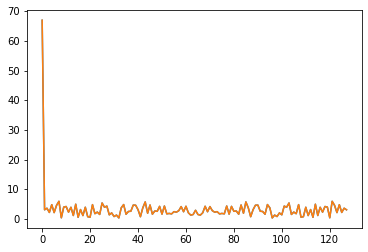

In [53]:
plt.plot(np.abs(fft_m.transform(x)))

plt.plot(np.abs(np.fft.fft(x)))

# Barnes-Hut algorithm

https://lewiscoleblog.com/barnes-hut